In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')

# **0. 데이터 준비**

- **행정동** 단위까지 구분되어 있는 데이터로 군집화 수행
- 현재 데이터의 경우 상위 10개의 업종이 선택되어 있는 상태

In [3]:
df = pd.read_csv("./datasets/final_행정동.csv",encoding ="euc-kr")
df.head(10)

,행정구,행정동,갈비/삼겹살,닭/오리요리,분식,양식,유흥주점,일식/수산물,제과제빵떡케익,커피점/카페,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,종로구,청운효자동,4,4,27,34,11,9,12,50,...,62.0,703,1134,3081,4020,1419,1530,11887,0,0
1,종로구,사직동,13,14,51,66,37,41,24,131,...,62.0,532,681,2643,3037,1212,1274,9379,2,0
2,종로구,삼청동,1,0,17,42,10,9,7,95,...,58.0,121,218,646,814,432,428,2659,1,0
3,종로구,부암동,1,3,12,25,6,8,13,54,...,62.0,453,844,2575,3184,1311,1223,9590,0,0
4,종로구,평창동,4,5,17,18,13,10,7,51,...,62.0,1119,1550,4381,5911,2715,2276,17952,0,0
5,종로구,무악동,2,3,5,0,4,1,4,10,...,71.0,594,943,1721,2792,1048,986,8084,0,0
6,종로구,교남동,3,7,9,5,3,5,2,13,...,65.0,788,824,2691,3438,1188,1119,10048,1,0
7,종로구,가회동,2,4,17,34,9,7,7,69,...,62.0,190,308,997,1405,581,605,4086,0,0
8,종로구,"종로1,2,3,4가동",44,39,135,130,141,116,38,308,...,70.0,350,408,2586,2670,1382,1123,8519,4,3
9,종로구,"종로5,6가동",13,15,30,10,55,21,7,54,...,69.0,92,208,2249,1450,778,732,5509,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             426 non-null    object 
 1   행정동             426 non-null    object 
 2   갈비/삼겹살          426 non-null    int64  
 3   닭/오리요리          426 non-null    int64  
 4   분식              426 non-null    int64  
 5   양식              426 non-null    int64  
 6   유흥주점            426 non-null    int64  
 7   일식/수산물          426 non-null    int64  
 8   제과제빵떡케익         426 non-null    int64  
 9   커피점/카페          426 non-null    int64  
 10  패스트푸드           426 non-null    int64  
 11  한식/백반/한정식       426 non-null    int64  
 12  총생활인구수_평일       426 non-null    float64
 13  10대 미만 생활인구_평일  426 non-null    float64
 14  10대 생활인구_평일     426 non-null    float64
 15  20~30대 생활인구_평일  426 non-null    float64
 16  40~50대 생활인구_평일  426 non-null    float64
 17  60대 생활인구_평일     426 non-null    flo

- 총 48개의 컬럼, 426개의 데이터(행, 행정구 단위)
    - 음식 업종 수(10개) + 변수(38개)
- 결측치는 존재하지 않는다.

# **1. 데이터 선택 & EDA**

In [5]:
### 한식 업종만 선택

hansik = pd.concat([df.iloc[:,0:2],df.iloc[:,11],df.iloc[:,12:]],axis = 1)
hansik.head()

,행정구,행정동,한식/백반/한정식,총생활인구수_평일,10대 미만 생활인구_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,종로구,청운효자동,71,442579.2181,36890.666270,59721.67251,118156.80220,136514.38100,41904.34735,49391.34980,...,62.0,703,1134,3081,4020,1419,1530,11887,0,0
1,종로구,사직동,207,661216.6660,20794.603460,30301.91251,248640.53090,253453.84450,57569.56687,50456.20774,...,62.0,532,681,2643,3037,1212,1274,9379,2,0
2,종로구,삼청동,49,136737.9628,4350.119023,11496.49443,46901.51971,46193.60565,14393.21275,13403.01152,...,58.0,121,218,646,814,432,428,2659,1,0
3,종로구,부암동,27,345738.9314,21123.463860,45104.07425,93415.85532,104282.97340,39364.52067,42448.04404,...,62.0,453,844,2575,3184,1311,1223,9590,0,0
4,종로구,평창동,41,426374.0894,26428.814860,45665.26199,92648.95199,138908.72900,60519.32400,62203.00899,...,62.0,1119,1550,4381,5911,2715,2276,17952,0,0


In [6]:
### 상관계수
# 각 변수들과 업소 수 간의 상관관계 파악

hansik_corr = pd.DataFrame(hansik.corr().iloc[0,1:])
hansik_corr['절댓값'] = hansik_corr.abs() # 상관계수 절댓값
hansik_corr = hansik_corr.sort_values(by = '절댓값',ascending = False).reset_index(drop = False)
hansik_corr.columns = ['변수','상관계수','절댓값']
hansik_corr

,변수,상관계수,절댓값
0,20~30대 생활인구_평일,0.840520,0.840520
1,20~30대 생활인구_주말,0.788890,0.788890
2,총생활인구수_평일,0.752952,0.752952
3,40~50대 생활인구_평일,0.742081,0.742081
4,총생활인구수_주말,0.647856,0.647856
5,40~50대 생활인구_주말,0.576991,0.576991
6,60대 생활인구_평일,0.557881,0.557881
7,60대 생활인구_주말,0.427194,0.427194
8,70대 이상 생활인구_평일,0.408061,0.408061
9,역(전체),0.404281,0.404281


### **1-1. 변수 선택**
- 각 데이터셋에서 상관계수가 높은 변수들을 적정 개수만큼 선택
- 상위 10개 변수 선택
    - 생활인구: 2개
    - 대학정보: 1개
    - 초중고학교정보: 2개
    - 소득정보: 1개
    - 상권변화지표: 1개
    - 주민등록인구: 2개
    - 지하철: 1개

In [7]:
hansik_variables = list(hansik_corr.iloc[[0,1,3,4,14,16,18,20,30,31]]['변수'])
hansik_variables

['20~30대 생활인구_평일',
 '20~30대 생활인구_주말',
 '40~50대 생활인구_평일',
 '총생활인구수_주말',
 '70대 이상 생활인구_주말',
 '10대 생활인구_주말',
 '10대 미만 생활인구_주말',
 '총인구수',
 '초중고(전체)',
 '고등학교']

In [8]:
### 군집분석에 활용할 데이터 가공

df2 = hansik.iloc[:, (i for i,x in enumerate(hansik.columns) if x in hansik_variables)]
df_hansik = pd.concat([hansik.iloc[:,0:3],df2],axis = 1)
df_hansik.head()

,행정구,행정동,한식/백반/한정식,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,70대 이상 생활인구_주말,초중고(전체),고등학교,총인구수
0,종로구,청운효자동,71,118156.80220,136514.38100,447607.5454,31067.87931,44347.35360,129714.71360,50884.09214,6,3,11680
1,종로구,사직동,207,248640.53090,253453.84450,480448.5970,26871.44381,33437.56351,162617.91460,50191.60188,1,0,8705
2,종로구,삼청동,49,46901.51971,46193.60565,136689.7339,5577.27740,10146.91644,49880.92931,12619.33076,2,1,2433
3,종로구,부암동,27,93415.85532,104282.97340,333707.8092,17655.70934,34937.31624,83895.52676,44309.01901,4,1,9666
4,종로구,평창동,41,92648.95199,138908.72900,456256.3544,28486.92466,44148.96949,98373.24814,64881.31729,1,1,17379


### **1-2. 데이터 세트의 왜곡 정도 낮추기**
- Scipy의 stats 모듈의 **skew()** 함수를 이용해 추출
- 반환 값이 1 이상인 경우 왜곡 정도가 높다고 판단
    - 상황에 따라 편차는 존재함
    - 1 이상의 값을 반환하는 피처만 추출해 왜곡 정도를 완화하기 위해 **Box-Cox 변환**을 적용

In [9]:
### 데이터 왜곡 정도 확인
# 왜곡 정도가 1 이상인 컬럼들만 추출

from scipy.stats import skew

features_idx = df_hansik.dtypes[df_hansik.dtypes != 'object'].index
skew_features = df_hansik[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

skew_features_top = skew_features[skew_features > 1]
print()
print(skew_features_top.sort_values(ascending = False))

전체 왜곡 정도: 2.099351

한식/백반/한정식         4.052724
20~30대 생활인구_평일    3.371157
20~30대 생활인구_주말    2.721569
40~50대 생활인구_평일    2.564897
10대 미만 생활인구_주말    2.307946
고등학교              2.177506
10대 생활인구_주말       2.115052
총생활인구수_주말         1.248200
초중고(전체)           1.209511
dtype: float64


In [10]:
### Box-Cox 변환 적용
# 데이터를 변환하기 위해서는 데이터가 양수여야 함
# 따라서, 모든 데이터에 1을 더해준 후 로그 변환 수행

from scipy import stats

skewed = list(skew_features_top.index)

for ftr in skewed:
    # boxcox() 실행 결과 변환값과 최적 람다 값을 동시에 반환됨
    df_hansik[ftr] = stats.boxcox(df_hansik[ftr] + 1)[0] 

df_hansik.head()

,행정구,행정동,한식/백반/한정식,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,70대 이상 생활인구_주말,초중고(전체),고등학교,총인구수
0,종로구,청운효자동,5.514835,7.329876,7.904776,85.235902,23.965527,12.422889,14.963071,50884.09214,2.402378,0.710900,11680
1,종로구,사직동,7.353406,7.590347,8.158784,86.729306,23.323896,12.046394,15.323413,50191.60188,0.745997,0.000000,8705
2,종로구,삼청동,4.932623,6.981997,7.431193,63.564817,17.171073,10.488002,13.474546,12619.33076,1.235311,0.484852,2433
3,종로구,부암동,4.055384,7.244051,7.790561,79.299260,21.540957,12.104704,14.277429,44309.01901,1.913990,0.484852,9666
4,종로구,평창동,4.662697,7.241008,7.912072,85.637132,23.580419,12.416888,14.526554,64881.31729,0.745997,0.484852,17379


- 데이터가 제대로 변환되었음을 확인할 수 있다.

In [11]:
### 데이터 왜곡 정도 재확인

features_idx = df_hansik.dtypes[df_hansik.dtypes != 'object'].index
skew_features = df_hansik[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 0.151822


- 데이터의 왜곡 정도가 2.099351에서 0.151822로 완화됨

### **1-3. 스케일 조정**
- 데이터의 패턴이 결과에 직접적으로 영향을 미치는 비지도학습의 경우 데이터 스케일링이 선행되는 것이 권장된다.
- 피처 스케일링 방법 중 '표준화' 진행
    - StandardScaler로 평균과 표준편차를 재조정

In [12]:
### 데이터 스케일링

from sklearn.preprocessing import StandardScaler

feature_df = df_hansik.iloc[:,2:] # feature data

# 표준화
scaler = StandardScaler()
hansik_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구,행정동 컬럼 결합
hansik_std = pd.concat([pd.DataFrame(df_hansik[['행정구','행정동']]),hansik_std],axis = 1)
hansik_std.head(3) # 표준화된 데이터 확인

,행정구,행정동,한식/백반/한정식,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,70대 이상 생활인구_주말,초중고(전체),고등학교,총인구수
0,종로구,청운효자동,0.411471,-0.418912,-0.304805,-0.328638,-0.114864,0.059662,-0.342248,-0.328933,1.211932,1.591409,-1.248870
1,종로구,사직동,1.798977,0.747161,0.888826,-0.180312,-0.345745,-0.407451,0.058142,-0.356108,-0.920061,-0.910114,-1.587544
2,종로구,삼청동,-0.027903,-1.976289,-2.530261,-2.481030,-2.559747,-2.340929,-1.996207,-1.830510,-0.290246,0.795986,-2.301550


# **2. K-Means 군집화**

In [13]:
from sklearn.cluster import KMeans

### **2-1. 군집 개수 정하기**

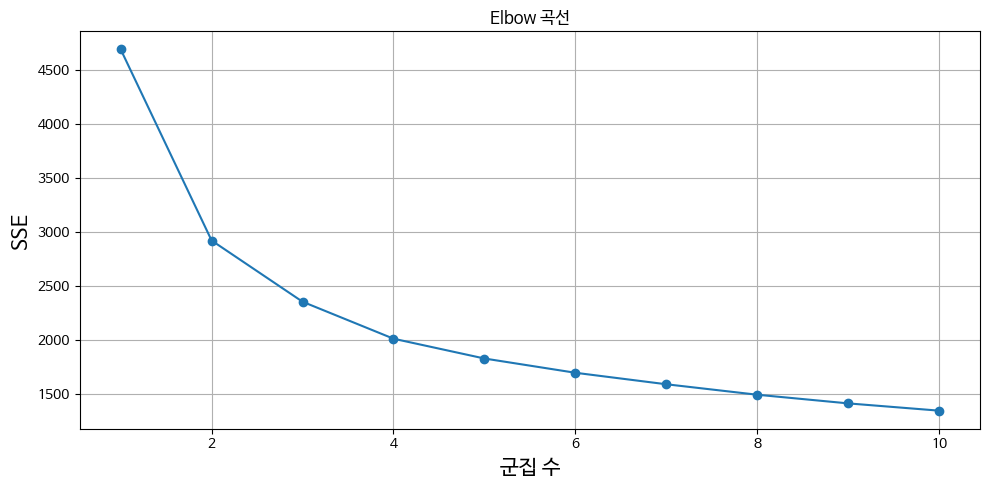

In [14]:
### Inertia, Elbow 구하기

# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집 개수 1~10까지 kmeans를 실행 => sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i, # 군집화 할 개수
               init = 'k-means++', # 초기에 군집 중심점의 좌표를 설정할 방식
               n_init = 10,
               max_iter = 300, # 최대 반복 횟수
               random_state = 0)
    km.fit(hansik_std.iloc[:,2:]) # '행정구','행정동' 컬럼 제거
    sse.append(km.inertia_)

# sse array 시각화   
plt.figure(figsize = (10,5))
plt.title('Elbow 곡선')
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('군집 수',fontsize = 15)
plt.ylabel('SSE', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

- **k = 4**일 때 급격한 거리의 변화가 일어난 것으로 보아 클러스터 수로 **4개**가 적절해 보인다.

### **2-2. K-Means 군집화 수행**

In [15]:
### 데이터를 4개의 그룹으로 군집화
# 군집화 시 행정구,행정동 컬럼은 필요 없으므로 제외

kmeans = KMeans(
    n_clusters = 4, 
    init = 'k-means++', 
    max_iter = 300, 
    random_state = 0)
kmeans.fit(hansik_std.iloc[:,2:])

KMeans(n_clusters=4, random_state=0)

In [16]:
### 각 행정구가 어느 군집화 중심에 속하는지 확인

hansik_std['cluster'] = kmeans.labels_ # 군집화 컬럼 추가
print(kmeans.labels_)
print()
print(len(kmeans.labels_))

[1 0 3 3 1 3 3 3 2 3 0 2 3 3 3 3 3 1 0 0 3 3 0 3 1 1 0 3 3 3 3 3 3 3 0 1 0
 1 3 3 2 1 3 3 3 0 0 3 0 2 0 1 0 1 3 1 0 3 1 1 0 1 0 3 0 2 0 0 0 0 1 1 2 0
 1 1 0 1 0 2 2 2 2 1 0 0 2 2 1 1 0 1 1 0 0 0 3 0 0 1 1 0 1 0 1 0 2 3 2 0 1
 1 1 3 3 1 0 3 0 1 0 2 0 2 1 0 0 3 3 2 1 1 2 1 1 0 3 3 1 0 0 0 2 1 0 3 1 0
 1 1 0 0 0 1 1 3 0 1 1 0 2 2 1 0 1 1 1 2 2 2 0 0 2 1 1 3 2 2 1 0 1 1 2 1 0
 1 2 0 3 0 3 2 1 2 2 2 2 0 0 3 0 1 3 0 1 2 1 2 0 0 1 1 1 0 2 0 0 0 1 1 2 2
 2 0 0 1 2 0 3 1 3 3 3 0 0 0 2 2 1 1 2 0 1 2 2 3 0 1 2 0 2 2 3 3 2 2 2 2 0
 1 2 1 2 2 0 2 3 1 1 2 0 0 0 2 1 1 2 2 3 1 3 2 1 3 3 3 1 2 2 0 2 0 2 1 1 0
 3 3 3 1 0 0 0 0 2 0 2 0 0 0 2 0 2 0 3 3 2 0 1 1 3 1 1 0 2 2 0 1 0 0 0 0 0
 0 3 0 1 1 1 1 2 2 2 2 2 3 2 0 0 2 0 0 1 1 1 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2
 2 1 3 1 1 2 1 1 0 1 0 2 3 0 3 0 1 2 1 2 2 1 2 2 2 0 0 0 2 2 2 2 1 2 1 2 3
 2 1 0 0 1 1 1 2 0 1 2 2 0 0 0 0 2 3 1]

426


In [17]:
### 군집화 결과 확인

df_result = hansik_std.groupby(['cluster'])['행정동'].count()
print(df_result)

cluster
0    126
1    115
2    113
3     72
Name: 행정동, dtype: int64


In [19]:
### 차원 축소
# 평면에 시각화를 위해 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(hansik_std.iloc[:,2:-1])

hansik_std['pca_x'] = pca_transformed[:,0]
hansik_std['pca_y'] = pca_transformed[:,1]
hansik_std.head(3)

,행정구,행정동,한식/백반/한정식,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,70대 이상 생활인구_주말,초중고(전체),고등학교,총인구수,cluster,pca_x,pca_y
0,종로구,청운효자동,0.411471,-0.418912,-0.304805,-0.328638,-0.114864,0.059662,-0.342248,-0.328933,1.211932,1.591409,-1.248870,1,0.610660,-1.510807
1,종로구,사직동,1.798977,0.747161,0.888826,-0.180312,-0.345745,-0.407451,0.058142,-0.356108,-0.920061,-0.910114,-1.587544,0,0.055666,2.342102
2,종로구,삼청동,-0.027903,-1.976289,-2.530261,-2.481030,-2.559747,-2.340929,-1.996207,-1.830510,-0.290246,0.795986,-2.301550,3,6.076781,-0.330078


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


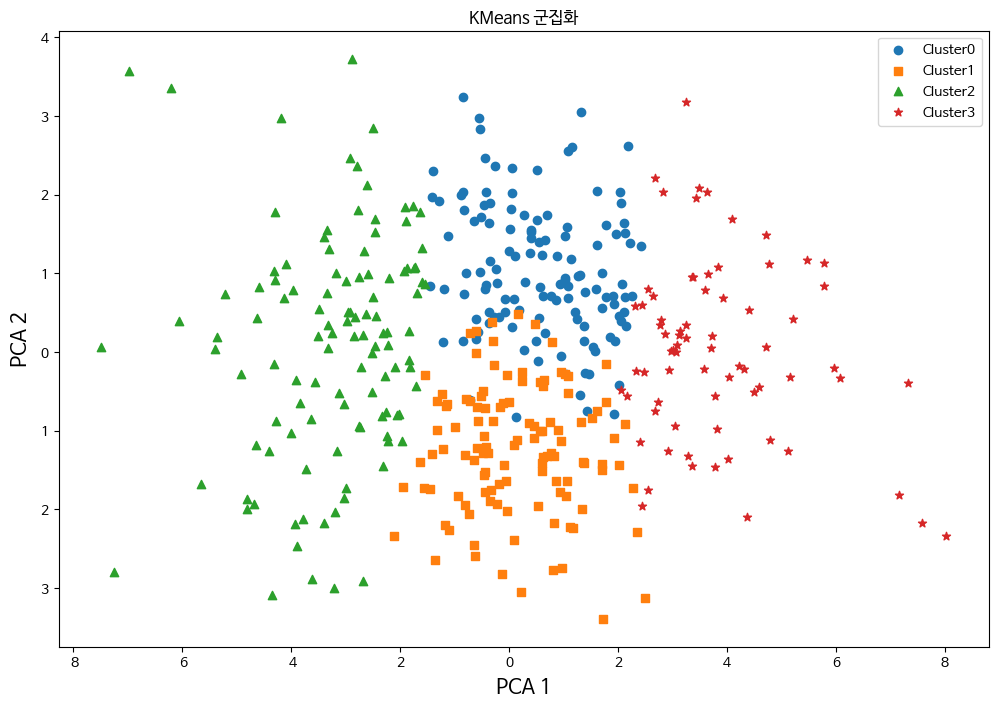

In [20]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2, 3인 경우마다 별도의 인덱스로 추출
marker0_ind = hansik_std[hansik_std['cluster'] == 0].index
marker1_ind = hansik_std[hansik_std['cluster'] == 1].index
marker2_ind = hansik_std[hansik_std['cluster'] == 2].index
marker3_ind = hansik_std[hansik_std['cluster'] == 3].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (12,8))

plt.scatter(x = hansik_std.loc[marker0_ind,'pca_x'],y = hansik_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = hansik_std.loc[marker1_ind,'pca_x'],y = hansik_std.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = hansik_std.loc[marker2_ind,'pca_x'],y = hansik_std.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x = hansik_std.loc[marker3_ind,'pca_x'],y = hansik_std.loc[marker3_ind,'pca_y'], marker='*')

plt.legend(['Cluster0','Cluster1','Cluster2','Cluster3'],fontsize = 10)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2',size = 15)
plt.title('KMeans 군집화')
plt.show()

In [21]:
### 각 군집에 해당하는 행정동 확인하기

group0 = list(hansik_std.loc[hansik_std['cluster'] == 0,'행정동'])
print("군집0: "+ str(group0))
print()

group1 = list(hansik_std.loc[hansik_std['cluster'] == 1,'행정동'])
print("군집1: "+ str(group1))
print()

group2 = list(hansik_std.loc[hansik_std['cluster'] == 2,'행정동'])
print("군집2: "+ str(group2))
print()

group3 = list(hansik_std.loc[hansik_std['cluster'] == 3,'행정동'])
print("군집3: "+ str(group3))

군집0: ['사직동', '이화동', '회현동', '명동', '광희동', '약수동', '남영동', '원효로1동', '한남동', '서빙고동', '왕십리2동', '마장동', '행당1동', '금호2,3가동', '성수1가2동', '성수2가3동', '용답동', '군자동', '중곡1동', '중곡2동', '중곡3동', '자양1동', '자양4동', '구의2동', '답십리1동', '답십리2동', '휘경1동', '이문2동', '면목2동', '면목4동', '면목본동', '면목7동', '상봉2동', '중화2동', '묵2동', '신내2동', '보문동', '정릉2동', '정릉4동', '길음2동', '월곡2동', '장위1동', '번1동', '수유2동', '수유3동', '우이동', '창2동', '창5동', '쌍문1동', '쌍문2동', '쌍문3동', '방학3동', '월계3동', '하계2동', '상계3,4동', '상계5동', '갈현1동', '응암2동', '신사1동', '증산동', '홍제1동', '홍제3동', '홍은1동', '남가좌2동', '도화동', '용강동', '서강동', '합정동', '망원1동', '망원2동', '목2동', '목3동', '신월1동', '신월7동', '신정1동', '신정2동', '등촌1동', '화곡3동', '화곡6동', '방화2동', '구로4동', '개봉2동', '개봉3동', '오류1동', '당산1동', '도림동', '신길1동', '신길7동', '대림1동', '대림2동', '대림3동', '노량진2동', '상도2동', '상도3동', '상도4동', '사당1동', '사당3동', '신대방1동', '낙성대동', '중앙동', '남현동', '서원동', '신원동', '서림동', '신사동', '신림동', '조원동', '반포2동', '반포3동', '방배본동', '방배1동', '내곡동', '일원2동', '풍납1동', '거여2동', '마천2동', '가락1동', '가락2동', '문정1동', '상일2동', '명일1동', '암사2동', '천호3동', '성내1동', '성내2동', '성내3동']

군집1:

In [22]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(hansik_std.loc[hansik_std['cluster'] == 0,'행정구'].unique())
print("군집0: "+ str(group0))
print()

group1 = list(hansik_std.loc[hansik_std['cluster'] == 1,'행정구'].unique())
print("군집1: "+ str(group1))
print()

group2 = list(hansik_std.loc[hansik_std['cluster'] == 2,'행정구'].unique())
print("군집2: "+ str(group2))
print()

group3 = list(hansik_std.loc[hansik_std['cluster'] == 3,'행정구'].unique())
print("군집3: "+ str(group3))

군집0: ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

군집1: ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

군집2: ['종로구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

군집3: ['종로구', '중구', '용산구', '성동구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


### **2-3. 군집화 평가**

#### **a) 실루엣 계수**

In [23]:
### 실루엣 분석을 위한 API 추가

from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
### 모든 개별 데이터에 대해 실루엣 계수 값 구하기

score_samples = silhouette_samples(hansik_std.iloc[:,2:-3],hansik_std['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (426,)


In [25]:
### 모든 데이터의 평균 실루엣 계수값 구하기

average_score = silhouette_score(hansik_std.iloc[:,2:-3],hansik_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

실루엣 분석 점수: 0.238


In [26]:
### 실루엣 계수 컬럼 추가

hansik_std['silhouette_coef'] = score_samples
hansik_std.head(3)

,행정구,행정동,한식/백반/한정식,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,70대 이상 생활인구_주말,초중고(전체),고등학교,총인구수,cluster,pca_x,pca_y,silhouette_coef
0,종로구,청운효자동,0.411471,-0.418912,-0.304805,-0.328638,-0.114864,0.059662,-0.342248,-0.328933,1.211932,1.591409,-1.248870,1,0.610660,-1.510807,0.364912
1,종로구,사직동,1.798977,0.747161,0.888826,-0.180312,-0.345745,-0.407451,0.058142,-0.356108,-0.920061,-0.910114,-1.587544,0,0.055666,2.342102,0.262319
2,종로구,삼청동,-0.027903,-1.976289,-2.530261,-2.481030,-2.559747,-2.340929,-1.996207,-1.830510,-0.290246,0.795986,-2.301550,3,6.076781,-0.330078,0.410282


In [27]:
### 군집별로 실루엣 계수의 평균값 구하기

hansik_std.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.266154
1    0.247875
2    0.192169
3    0.243342
Name: silhouette_coef, dtype: float64

#### **b) Davies Bouldin Index**

In [28]:
### Davies Bouldin Index 계산을 위한 API 추가

from sklearn.metrics import davies_bouldin_score

In [29]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(hansik_std.iloc[:,2:-3],hansik_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 1.174
